In [ ]:
# if open from google colab, run this command
from google.colab import drive
drive.mount('/content/drive')
# %cd /content/drive/MyDrive/Github/sales-prediction-gru/ipynb
%cd /content/drive/Shareddrives/BUAT\ DIEGO/Data-retail-2015-2022-keluar/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/Shareddrives/BUAT DIEGO/Data-retail-2015-2022-keluar


In [ ]:
import numpy as np
import pandas as pd 
import os

from sklearn.metrics import mean_squared_error

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline 

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
#loading data 
# df2015 = pd.read_csv('./data-2015-renew.csv')
df2016 = pd.read_csv('./data-2016-renew.csv', parse_dates=['tgl'])
df2017 = pd.read_csv('./data-2017-renew.csv', parse_dates=['tgl'])
df2018 = pd.read_csv('./data-2018-renew.csv', parse_dates=['tgl'])
df2019 = pd.read_csv('./data-2019-renew.csv', parse_dates=['tgl'])
# df2020 = pd.read_csv('./data-2020-renew.csv')
# df2021 = pd.read_csv('./data-2021-renew.csv')
# df2022 = pd.read_csv('./data-2022-renew.csv')

In [ ]:
df2016 = df2016.drop(['notxn', 'nonota', 'namabarang', 'hargajual', 'hargabeli', 'diskon', 'hargaafterdiskon', 'subtotal', 'kodeop', 'isbkp', 'kodecustomer', 'iddistributor', 'idpromo', 'iddivisi', 'jenis', 'kategori', 'kodedepartemen', 'departemen', 'namaop', 'kodedivisibarang', 'divisibarang'], axis=1)
df2017 = df2017.drop(['notxn', 'nonota', 'namabarang', 'hargajual', 'hargabeli', 'diskon', 'hargaafterdiskon', 'subtotal', 'kodeop', 'isbkp', 'kodecustomer', 'iddistributor', 'idpromo', 'iddivisi', 'jenis', 'kategori', 'kodedepartemen', 'departemen', 'namaop', 'kodedivisibarang', 'divisibarang'], axis=1)
df2018 = df2018.drop(['notxn', 'nonota', 'namabarang', 'hargajual', 'hargabeli', 'diskon', 'hargaafterdiskon', 'subtotal', 'kodeop', 'isbkp', 'kodecustomer', 'iddistributor', 'idpromo', 'iddivisi', 'jenis', 'kategori', 'kodedepartemen', 'departemen', 'namaop', 'kodedivisibarang', 'divisibarang'], axis=1)
df2019 = df2019.drop(['notxn', 'nonota', 'namabarang', 'hargajual', 'hargabeli', 'diskon', 'hargaafterdiskon', 'subtotal', 'kodeop', 'isbkp', 'kodecustomer', 'iddistributor', 'idpromo', 'iddivisi', 'jenis', 'kategori', 'kodedepartemen', 'departemen', 'namaop', 'kodedivisibarang', 'divisibarang'], axis=1)

In [ ]:
df = pd.concat([df2016, df2017, df2018])

In [ ]:
# remove strange value in each rows
df['barcode'] = df['barcode'].str.split(' ').str[0]

In [ ]:
# df['Year-Month'] = df['tgl'].apply(lambda x: x.strftime('%Y-%m')).astype(str)
df['month_yr'] = df['tgl'].apply(lambda x: x.strftime('%m-%y')).astype(str)

In [ ]:
df['month_yr'] = df['month_yr'].map({'01-16':0,'02-16':1,'03-16':2,'04-16':3,'05-16':4,'06-16':5,'07-16':6,'08-16':7,'09-16':8,'10-16':9,'11-16':10,'12-16':11,
                                          '01-17':12,'02-17':13,'03-17':14,'04-17':15,'05-17':16,'06-17':17,'07-17':18,'08-17':19,'09-17':20,'10-17':21,'11-17':22,'12-17':23,
                                          '01-18':24,'02-18':25,'03-18':26,'04-18':27,'05-18':28,'06-18':29,'07-18':30,'08-18':31,'09-18':32,'10-18':33,'11-18':34,'12-18':35})

In [ ]:
#we can see that 'date' column in sales_data is an object but if we want to manipulate 
#it or want to work on it someway then we have convert it on datetime format
df['tgl'] = pd.to_datetime(df['tgl'], format='%d.%m.%Y')

In [ ]:
# remove negative qty and get data from under 4000 qty
df = df[df['qty'] > 0]
df = df[df['qty'] < 4000]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


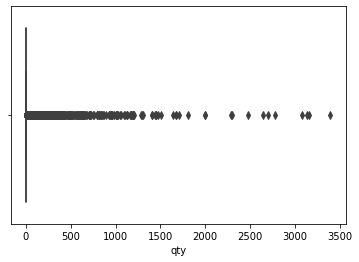

In [ ]:
# reviewing the outlier of the number of products sold
ax = sns.boxplot(df['qty']) 

In [ ]:
#now we will create a pivot tabel by going so we get our data in desired form 
#we want get total count value of an item over the whole month for a shop 
# That why we made kodejenis and barcode our indices and month_yr our column 
# the value we want is qty and used sum as aggregating function 
dataset = df.pivot_table(index = ['kodejenis', 'barcode'], values=['qty'], columns=['month_yr'], fill_value=0, aggfunc='sum')

In [ ]:
# lets reset our indices, so that data should be in way we can easily manipulate
dataset.reset_index(inplace = True)

In [ ]:
# lets check on our pivot table
dataset.head()

kodejenis        barcode  qty                                     \
month_yr                             0    1    2    3    4    5    6    7   
0            10101   089686960044  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1            10101   089686960075  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2            10101   089686960396  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3            10101   089686960402  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4            10101  4902430287883  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

                                                                           \
month_yr    8    9   10   11   12   13   14   15   16   17   18   19   20   
0         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4         0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

                                                                          \
month_yr   21   22   23   24   25   26   27    28   29    30    31    32   
0         0.0  4.0  0.0  2.0  3.0  2.0  7.0  11.0  8.0  10.0   5.0   6.0   
1         0.0  3.0  7.0  1.0  2.0  6.0  4.0   0.0  0.0   0.0   0.0   0.0   
2         0.0  5.0  4.0  5.0  8.0  4.0  6.0   4.0  0.0   0.0   0.0   0.0   
3         2.0  5.0  5.0  0.0  2.0  4.0  5.0   9.0  7.0  12.0  18.0  12.0   
4         0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0   0.0   0.0   0.0   

                          
month_yr    33   34   35  
0         11.0  4.0  3.0  
1          4.0  2.0  1.0  
2          0.0  0.0  0.0  
3          6.0  5.0  4.0  
4          0.0  0.0  0.0

In [ ]:
# test data
test_data = df2019.drop(['tgl', 'satuan', 'qty', 'kodekategori'], axis=1)

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2583077 entries, 0 to 2583076
Data columns (total 2 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   barcode    object
 1   kodejenis  object
dtypes: object(2)
memory usage: 39.4+ MB


In [ ]:
test_data = test_data.drop_duplicates(subset=['barcode', 'kodejenis'])

In [ ]:
test_data.tail()

,barcode,kodejenis
2565713,13013,11402
2569243,8995207801821,04030201
2570246,60156,11303
2573834,8886020212096,03030405
2574550,33248,11303


In [ ]:
# Now we will merge our pivot table with the test_data because we want to keep the data of items we have
# predict
dataset = pd.merge(test_data, dataset, on=['barcode','kodejenis'], how='left')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left,2 on the right)
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [ ]:
# lets fill all NaN values with 0
dataset.fillna(0, inplace=True)
# lets check our data now 
dataset.head()

,barcode,kodejenis,"(qty, 0)","(qty, 1)","(qty, 2)","(qty, 3)","(qty, 4)","(qty, 5)","(qty, 6)","(qty, 7)","(qty, 8)","(qty, 9)","(qty, 10)","(qty, 11)","(qty, 12)","(qty, 13)","(qty, 14)","(qty, 15)","(qty, 16)","(qty, 17)","(qty, 18)","(qty, 19)","(qty, 20)","(qty, 21)","(qty, 22)","(qty, 23)","(qty, 24)","(qty, 25)","(qty, 26)","(qty, 27)","(qty, 28)","(qty, 29)","(qty, 30)","(qty, 31)","(qty, 32)","(qty, 33)","(qty, 34)","(qty, 35)"
0,8992752011408,01020403,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8992696404441,01020109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,089686043686,01011202,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8992775204009,01011403,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,089686043204,01011202,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# we will drop kodekategori and barcode because we do not need them
# we are teaching our model how to generate the next sequence 
dataset.drop(['kodejenis','barcode'], inplace=True, axis=1)
dataset.head()

,"(qty, 0)","(qty, 1)","(qty, 2)","(qty, 3)","(qty, 4)","(qty, 5)","(qty, 6)","(qty, 7)","(qty, 8)","(qty, 9)","(qty, 10)","(qty, 11)","(qty, 12)","(qty, 13)","(qty, 14)","(qty, 15)","(qty, 16)","(qty, 17)","(qty, 18)","(qty, 19)","(qty, 20)","(qty, 21)","(qty, 22)","(qty, 23)","(qty, 24)","(qty, 25)","(qty, 26)","(qty, 27)","(qty, 28)","(qty, 29)","(qty, 30)","(qty, 31)","(qty, 32)","(qty, 33)","(qty, 34)","(qty, 35)"
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
dataset.head(100)

,"(qty, 0)","(qty, 1)","(qty, 2)","(qty, 3)","(qty, 4)","(qty, 5)","(qty, 6)","(qty, 7)","(qty, 8)","(qty, 9)","(qty, 10)","(qty, 11)","(qty, 12)","(qty, 13)","(qty, 14)","(qty, 15)","(qty, 16)","(qty, 17)","(qty, 18)","(qty, 19)","(qty, 20)","(qty, 21)","(qty, 22)","(qty, 23)","(qty, 24)","(qty, 25)","(qty, 26)","(qty, 27)","(qty, 28)","(qty, 29)","(qty, 30)","(qty, 31)","(qty, 32)","(qty, 33)","(qty, 34)","(qty, 35)"
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# X we will keep all columns execpt the last one 
X_train = np.expand_dims(dataset.values[:,:-1],axis = 2)
# the last column is our label
y_train = dataset.values[:,-1:]

# for test we keep all the columns execpt the first one
X_test = np.expand_dims(dataset.values[:,1:],axis = 2)

# lets have a look on the shape 
print(X_train.shape,y_train.shape,X_test.shape)


(18769, 35, 1) (18769, 1) (18769, 35, 1)


In [ ]:
# importing libraries required for our model
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout

In [ ]:
# our defining our model 
my_model = Sequential()
my_model.add(GRU(units=64, input_shape=(35,1)))
my_model.add(Dropout(0.4))
my_model.add(Dense(1))

my_model.compile(loss='mse', optimizer='adam', metrics=['mean_squared_error'])
my_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                12864     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 12,929
Trainable params: 12,929
Non-trainable params: 0
_________________________________________________________________


In [ ]:
my_model.fit(X_train, y_train, batch_size=4096, epochs=10)

Epoch 1/10
5/5 [==============================] - 8s 808ms/step - loss: 16585.0566 - mean_squared_error: 16585.0566
Epoch 2/10
5/5 [==============================] - 4s 720ms/step - loss: 16579.8223 - mean_squared_error: 16579.8223
Epoch 3/10
5/5 [==============================] - 3s 509ms/step - loss: 16579.7637 - mean_squared_error: 16579.7637
Epoch 4/10
5/5 [==============================] - 3s 512ms/step - loss: 16579.3477 - mean_squared_error: 16579.3477
Epoch 5/10
5/5 [==============================] - 3s 507ms/step - loss: 16572.6582 - mean_squared_error: 16572.6582
Epoch 6/10
5/5 [==============================] - 3s 517ms/step - loss: 16575.0000 - mean_squared_error: 16575.0000
Epoch 7/10
5/5 [==============================] - 3s 512ms/step - loss: 16570.7090 - mean_squared_error: 16570.7090
Epoch 8/10
5/5 [==============================] - 3s 522ms/step - loss: 16567.7090 - mean_squared_error: 16567.7090
Epoch 9/10
5/5 [==============================] - 3s 512ms/step - loss: 

In [ ]:
gru_train_pred = my_model.predict(X_train)
print('Train rmse:', np.sqrt(mean_squared_error(y_train, gru_train_pred)))

Train rmse: 128.6949181303541


In [ ]:
# creating submission file 
submission_pfs = my_model.predict(X_test)
# we will keep every value between 0 and 20
submission_pfs = submission_pfs.clip(0,20)
# creating dataframe with required columns 
submission = pd.DataFrame({'ID':test_data['barcode'], 'item_cnt_month':submission_pfs.ravel()})
# creating csv file from dataframe
# submission.to_csv('sub_pfs.csv',index = False)

In [ ]:
submission.head(10)

,ID,item_cnt_month
0,8992752011408,0.226289
1,8992696404441,0.226289
2,089686043686,0.226289
3,8992775204009,0.226289
4,089686043204,0.226289
5,8992770094117,0.226289
6,8993560024901,0.226289
7,8999999059781,0.226289
8,8992802618731,0.226289
9,8993189270765,0.226289
